In [1]:
!pip install six
!pip install numpy
!pip install slimit
!pip install psutil
!pip install fastBPE
!pip install javalang
!pip install submitit
!pip install dpu-utils
!pip install astunparse
!pip install stringcase
!pip install scikit-learn
!pip install torch
!pip install transformers
!pip install fairseq
!pip install tree_sitter
!pip install tensorboard
!pip install sentencepiece
!pip install tensorboardX
!pip install sacrebleu
!pip install simpletransformers
!pip install torchmetrics
!pip install --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for slimit: filename=slimit-0.8.1-py3-none-any.whl size=79458 sha256=949be978bcf802db67c2dc9d369f0f50503e191832fbe4e899c47bf5e867f772
  Stored in directory: /root/.cache/pip/wheels/67/b4/c2/ebe388930097eb1456e91778daa41da8c461f88ce024db7aec
Successfully built slimit
  Preparing metadata (setup.py) ... done
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp310-cp310-linux_x86_64.whl size=64870 sha256=206f5b7147a87c023ee5a991087be77254cc039762a1aaf2a043e120eb6e11ad
  Stored in directory: /root/.cache/pip/wheels/13/5d/b9/4b8897941ebc9e8c6cc3f3ffd3ea5115731754269205098754
Successfully built fastBPE
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
# general
import os
import json
import random
import warnings
from typing import List,Tuple

# ML
import numpy as np
import scipy as sp
import pandas as pd

# visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch
import torch.nn as nn

# HF
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torchmetrics.text import BLEUScore, MatchErrorRate, CharErrorRate, TranslationEditRate, SacreBLEUScore
from torchmetrics.text.rouge import ROUGEScore
from torchmetrics import MetricCollection



import gzip
import json
import logging
import os
from pathlib import Path
from typing import Dict, List, Tuple

import numpy as np
import torch
from sklearn.metrics import f1_score
from tokenizers.implementations.byte_level_bpe import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import Dataset
from torch.utils.tensorboard.writer import SummaryWriter
from tqdm import tqdm, trange

from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers.data.metrics import acc_and_f1, simple_accuracy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XLCoST

In [4]:
# !gdown "14SEj8Q1oQaogQsaBn-9iTlMN334mW3d1&confirm=t"

In [5]:
!gdown "1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t
To: /kaggle/working/XLCoST_data.zip
100%|█████████████████████████████████████████| 298M/298M [00:01<00:00, 232MB/s]


In [6]:
!unzip "/content/XLCoST_data.zip"

unzip:  cannot find or open /content/XLCoST_data.zip, /content/XLCoST_data.zip.zip or /content/XLCoST_data.zip.ZIP.


In [7]:
!gdown "1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t
To: /kaggle/working/train-match-pairs-data-P-J-C#-C-JS.json
100%|█████████████████████████████████████████| 151M/151M [00:00<00:00, 224MB/s]


In [8]:
!gdown "1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t
To: /kaggle/working/val-match-pairs-data-P-J-C#-C-JS.json
100%|███████████████████████████████████████| 8.25M/8.25M [00:00<00:00, 255MB/s]


In [9]:
!gdown "1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t
To: /kaggle/working/val-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100%|███████████████████████████████████████| 8.25M/8.25M [00:00<00:00, 179MB/s]


In [10]:
!gdown "1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t
To: /kaggle/working/train-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100%|█████████████████████████████████████████| 151M/151M [00:00<00:00, 262MB/s]


In [11]:
!gdown "1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t
To: /kaggle/working/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt
100%|█████████████████████████████████████████| 500M/500M [00:02<00:00, 192MB/s]


In [12]:
!gdown "1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t
To: /kaggle/working/python_classifier_model_end_train.pt
100%|█████████████████████████████████████████| 334M/334M [00:01<00:00, 257MB/s]


In [13]:
!gdown "1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t
To: /kaggle/working/merges.txt
100%|████████████████████████████████████████| 483k/483k [00:00<00:00, 75.0MB/s]


In [14]:
!gdown "1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t
To: /kaggle/working/vocab.json
100%|████████████████████████████████████████| 994k/994k [00:00<00:00, 88.4MB/s]


# Shared code

## Datasets classes

In [15]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs):
      self.snip_pairs = snip_pairs

    def __len__(self):
        return len(self.snip_pairs)

    def __getitem__(self, idx):
        return self.snip_pairs[idx]

In [16]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.java_samples = []
      self.python_samples = []
      self.samples_idx = []
      for k in java_exmp.keys():
        self.java_samples.append(' '.join(java_exmp[k]))
        self.python_samples.append(' '.join(python_exmp[k]))
        self.samples_idx.append(k)

    def __len__(self):
        return len(self.samples_idx)

    def __getitem__(self, idx):
        java_code = self.java_samples[idx]
        python_code = self.python_samples[idx]
        exmp_id = self.samples_idx[idx]
        return exmp_id, java_code, python_code

In [17]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.code_pairs = []
      rng = np.random.default_rng()
      for k in java_exmp.keys():
        match_pair = (java_exmp[k], python_exmp[k], 1)
        keys_to_sample = list(java_exmp.keys()).copy()
        keys_to_sample.remove(k)
        sample_key = rng.choice(keys_to_sample)
        mismatch_pair = (java_exmp[k], python_exmp[sample_key], 0)
        self.code_pairs.append(match_pair)
        self.code_pairs.append(mismatch_pair)

    def __len__(self):
      return len(self.code_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.code_pairs[idx]
      return java_code, python_code, label

In [18]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs, create=True):
        if create:
          self.snip_pairs = []
          rng = np.random.default_rng()
          pair_idxs = [ i for i in range(len(snip_pairs))]
          for idx, pair in enumerate(snip_pairs):
            match_pair = (pair[0], pair[1], 1)
            keys_to_sample = pair_idxs.copy()
            keys_to_sample.remove(idx)
            sample_key = rng.choice(keys_to_sample)
            mismatch_pair = (pair[0], snip_pairs[sample_key][1], 0)
            self.snip_pairs.append(match_pair)
            self.snip_pairs.append(mismatch_pair)
        else:
            self.snip_pairs = snip_pairs

    def __len__(self):
      return len(self.snip_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.snip_pairs[idx]
      return java_code, python_code, label

## Read data functions

In [19]:
def read_examples(map_filename, code_filename):
    """Read examples from filename."""
    examples={}
    with open(map_filename) as f1,open(code_filename) as f2:
            for line1,line2 in zip(f1,f2):
              exp_id = int(line1.strip().split('-')[0])
              if exp_id in examples.keys():
                examples[exp_id].append(line2.strip())
              else:
                examples[exp_id] = [line2.strip()]
    return examples

In [20]:
def read_snip_examples(src_filename, trg_filename):
    """Read examples from filename."""
    examples=[]
    with open(src_filename) as f1,open(trg_filename) as f2:
            for line1,line2 in zip(f1,f2):
              examples.append((line1.strip(), line2.strip()))
    return examples

In [21]:
def read_match_pairs_json(file_path):
  with open(file_path, "r") as f:
    match_pairs = json.load(f)
    match_pairs = [(i['code1'], i['code2'], i['label']) for i in match_pairs]

    return match_pairs

## Models

In [22]:
import numpy as np
import time
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim = 1)

    # define the forward pass
    def forward(self, input, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(input, attention_mask = mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)


        # apply softmax activation
        x = self.softmax(x)
        return x

# Translate code

In [23]:
from transformers import TextClassificationPipeline

CODEBERTA_LANGUAGE_ID = "huggingface/CodeBERTa-language-id"

py_pipeline = TextClassificationPipeline(
    model=RobertaForSequenceClassification.from_pretrained(CODEBERTA_LANGUAGE_ID),
    tokenizer=RobertaTokenizer.from_pretrained(CODEBERTA_LANGUAGE_ID)
)

Some weights of the model checkpoint at huggingface/CodeBERTa-language-id were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
import numpy as np
import torch
import pickle
import pandas as pd
import torch.nn as nn
from torch.nn import DataParallel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel, AutoTokenizer
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

model_pretained_name = "NTUYG/DeepSCC-RoBERTa"
pt_model = AutoModel.from_pretrained(model_pretained_name)

logic_tokenizer = AutoTokenizer.from_pretrained(model_pretained_name)

for param in pt_model.parameters():
    param.requires_grad = False

logic_model = BERT_Arch(pt_model)
logic_model.load_state_dict(torch.load("/kaggle/working/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt", map_location=device))
logic_model = logic_model.to(device)
logic_model.eval()


BERT_Arch(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((7

In [25]:
def convert_snips_to_logic_features(examples, tokenizer, max_source_length=128, max_target_length=128):
    tokens = []
    masks = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example in examples:
        java_code, python_code = example

        source_tokens = tokenizer.tokenize(java_code)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * len(source_ids)
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        target_tokens = tokenizer.tokenize(python_code)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] * len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length

        src_trg_tokens = source_ids + target_ids
        src_trg_mask = source_mask + target_mask

        tokens.append(torch.tensor(src_trg_tokens))
        masks.append(torch.tensor(src_trg_mask))


    return tokens, masks

In [26]:
def convert_examples_to_features(examples, tokenizer, max_source_length=128, max_target_length=128, stage=None):
    features = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example_index, example in enumerate(examples):
        #source
        source, target = example
        source_tokens = tokenizer.tokenize(source)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * (len(source_tokens))
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        #target
        if stage=="test":
            target_tokens = tokenizer.tokenize("None")
        else:
            target_tokens = tokenizer.tokenize(target)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] *len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length


        features.append(
            (
                 example_index,
                 torch.tensor(source_ids, dtype=torch.long).to(device),
                 torch.tensor(target_ids, dtype=torch.long).to(device),
                 torch.tensor(source_mask, dtype=torch.long).to(device),
                 torch.tensor(target_mask, dtype=torch.long).to(device)
            )
        )
    return features

In [27]:
import numpy as np
import time
import torch
from sklearn.metrics import accuracy_score
import os
from tqdm import tqdm

def train(epochs, examples, val_examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, val_dataloader, max_target_length, beam_size):
    train_losses = []
    valid_losses = []
    epoch_losses = {}
    # set initial loss to infinite
    best_valid_loss = float('inf')
    result_name = MODEL_FILE_PREFIX + ".txt"
    epoch_losses_file = MODEL_FILE_PREFIX + "-epoch_losses" + ".json"
    f = open(result_name, "w")
    f.close()
    # for each epoch
    for epoch in tqdm(range(epochs)):
        # train model
        train_loss, losses, preds = train_epoch(examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size)
        epoch_losses[str(epoch)] = losses

        with open(MODEL_FILE_PREFIX+"-ep-train-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # evaluate model
        valid_loss, acc_score, preds = evaluate(val_examples, val_dataloader, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, cross_entropy, max_target_length, beam_size)
        with open(MODEL_FILE_PREFIX+"-ep-eval-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

#         print(f"Epoch: {epoch}, Loss: {train_loss}, Val accuracy: {acc_score}, Val loss: {valid_loss}")
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')
        print(f'Accuracy: {acc_score:.3f}')
        with open(result_name, "a") as f:
            f.writelines(f'{train_loss:.3f} {valid_loss:.3f} {acc_score:.3f}')
            f.writelines("\n")

        with open(epoch_losses_file, "w") as f:
            json.dump(epoch_losses, f)

    return train_losses, valid_losses


def train_epoch(examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size):
    trans_model.train()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    losses = []
    total_preds = []

    # iterate over batches
    for step, batch in tqdm(enumerate(train_dataloader)):

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)

        trans_model.zero_grad()
        optimizer.zero_grad()

        try:
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss
        except Exception as e:
            print(exmp_idxs)
            print(source_ids)
            print(target_ids)
            raise e

        preds = trans_model.generate(source_ids,
                                       attention_mask=source_mask,
                                       use_cache=True,
                                       num_beams=beam_size,
                                       early_stopping=False,
                                       max_length=max_target_length)
        pred_ids = list(preds.cpu().numpy())
        p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

        is_python_pred = torch.tensor([1 if is_py_prd['label'] == 'python' else 0 for is_py_prd in py_pipeline(p)]).to(device)
        fake_model_py_logits = torch.ones((is_python_pred.size()[0],2)).to(device)
        fake_model_py_logits[:,0] = 0
        py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

        java_examp = [examples[i][0] for i in exmp_idxs]
        python_examp = [examples[i][1] for i in exmp_idxs]

        pairs = list(zip(java_examp,p))
        tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
        tok_pairs = torch.stack(tok_pairs).to(device)
        pairs_masks = torch.stack(pairs_masks).to(device)

        logic_logits = logic_model(tok_pairs, pairs_masks)
        logic_preds = torch.argmax(logic_logits, dim=1)
        fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
        fake_model_logic_logits[:,0] = 0
        logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

        batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss
        curr_loss = batch_loss.item()

        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
            print(f"curr_loss: {curr_loss}")

        if step % 100 == 0 and not step == 0:
            total_preds.extend(zip(java_examp,python_examp,p))

        if step % 400 == 0 and not step == 0 and curr_loss < losses[-1]:
            print("Saving model...")
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # backward pass to calculate the gradients
        batch_loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(trans_model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        total_loss += curr_loss
        losses.append(curr_loss)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    return avg_loss, losses,  [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]



# function for evaluating the model
def evaluate(examples, val_dataloader, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, cross_entropy, max_target_length, beam_size):
    print("\nEvaluating...")

    # deactivate dropout layers
    trans_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    acc_score = 0
    total_preds = []
    t0 = time.time()
    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = time.time() - t0

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)


        # deactivate autograd
        with torch.no_grad():

            # model predictions
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss

            preds = trans_model.generate(source_ids,
                                           attention_mask=source_mask,
                                           use_cache=True,
                                           num_beams=beam_size,
                                           early_stopping=False,
                                           max_length=max_target_length)
            pred_ids = list(preds.cpu().numpy())
            p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

            is_python_pred = torch.tensor([1 if is_py_prd['label'] == 'python' else 0 for is_py_prd in py_pipeline(p)]).to(device)
            fake_model_py_logits = torch.ones((is_python_pred.size()[0],2)).to(device)
            fake_model_py_logits[:,0] = 0
            py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

            java_examp = [examples[i][0] for i in exmp_idxs]
            python_examp = [examples[i][1] for i in exmp_idxs]
            total_preds.extend(zip(java_examp,python_examp,p))

            pairs = list(zip(java_examp,p))
            tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
            tok_pairs = torch.stack(tok_pairs).to(device)
            pairs_masks = torch.stack(pairs_masks).to(device)

            logic_logits = logic_model(tok_pairs, pairs_masks)
            logic_preds = torch.argmax(logic_logits, dim=1)
            fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
            fake_model_logic_logits[:,0] = 0
            logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

            batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss

            curr_loss = batch_loss.item()
            total_loss += curr_loss

    # compute the validation loss of the epoch
    for pred in total_preds:
          if pred[1] == pred[2]:
                acc_score += 1
    avg_loss = total_loss / len(val_dataloader)
    acc_score = acc_score / len(examples)

    return avg_loss, acc_score, [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]

In [28]:
from transformers import T5Config, T5ForConditionalGeneration, T5Tokenizer, PLBartConfig, PLBartForConditionalGeneration, PLBartTokenizer

In [29]:
# trans_model_name = 'Salesforce/codet5-base'
trans_model_name = 'uclanlp/plbart-python-en_XX'

In [30]:
# trans_config = T5Config.from_pretrained(trans_model_name)
trans_tokenizer = PLBartTokenizer.from_pretrained(trans_model_name)
trans_model = PLBartForConditionalGeneration.from_pretrained(trans_model_name)
# trans_tokenizer = RobertaTokenizer.from_pretrained(trans_model_name)
# trans_model = T5ForConditionalGeneration.from_pretrained(trans_model_name)
# trans_model.config.ctc_zero_infinity = True
trans_model = trans_model.to(device)

In [32]:
!unzip "XLCoST_data.zip"

Archive:  XLCoST_data.zip
   creating: XLCoST_data/
  inflating: __MACOSX/._XLCoST_data  
   creating: XLCoST_data/retrieval/
  inflating: __MACOSX/XLCoST_data/._retrieval  
   creating: XLCoST_data/generation/
  inflating: __MACOSX/XLCoST_data/._generation  
   creating: XLCoST_data/retrieval/nl2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._nl2code_search  
   creating: XLCoST_data/retrieval/code2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._code2code_search  
   creating: XLCoST_data/retrieval/.ipynb_checkpoints/
  inflating: __MACOSX/XLCoST_data/retrieval/._.ipynb_checkpoints  
   creating: XLCoST_data/generation/pair_data_tok_full_desc_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_full_desc_comment  
   creating: XLCoST_data/generation/pair_data_tok_1_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_1_comment  
   creating: XLCoST_data/generation/pair_data_tok_full_desc/
  inflating: __MACOSX/XLCoST_data/generat

In [33]:
random.seed(0)
train_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.py')
train_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(random.choices(train_snip_pairs_jp, k=int(len(train_snip_pairs_jp)/2)), trans_tokenizer))
val_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.py')
val_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(val_snip_pairs_jp, trans_tokenizer))


In [34]:
train_sampler = RandomSampler(train_snip_pairs_jp_dataset)
train_dataloader = DataLoader(train_snip_pairs_jp_dataset, sampler = train_sampler, batch_size = 32)

val_sampler = RandomSampler(val_snip_pairs_jp_dataset)
val_dataloader = DataLoader(val_snip_pairs_jp_dataset, sampler = val_sampler, batch_size = 32)

In [35]:
optimizer = torch.optim.AdamW(trans_model.parameters(), lr = 1e-4)

In [36]:
cross_entropy = nn.CrossEntropyLoss()

In [37]:
torch.cuda.empty_cache()

In [38]:
torch.autograd.set_detect_anomaly(True)

In [39]:
TRANS_LOSS_PRC = 1
PY_LOSS_PRC = 0.1
LOGIC_LOSS_PRC = 0.1
MODEL_FILE_PREFIX = "plbart-half-train-data-no-fine-tune-py-trans-80-1-1"

In [40]:
train_losses, valid_losses = train(epochs=1,
                                    examples=train_snip_pairs_jp,
                                    val_examples=val_snip_pairs_jp,
                                    trans_model=trans_model,
                                    py_pipeline=py_pipeline,
                                    logic_model=logic_model,
                                    trans_tok=trans_tokenizer,
                                    logic_tok=logic_tokenizer,
                                    train_dataloader=train_dataloader,
                                    cross_entropy=cross_entropy,
                                    optimizer=optimizer,
                                    val_dataloader=val_dataloader,
                                    max_target_length=128,
                                    beam_size=5)

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:11, 11.93s/it]
2it [00:22, 11.41s/it]
3it [00:33, 11.02s/it]
4it [00:43, 10.80s/it]
5it [00:54, 10.55s/it]
6it [01:04, 10.55s/it]
7it [01:15, 10.58s/it]
8it [01:25, 10.50s/it]
9it [01:36, 10.57s/it]
10it [01:46, 10.33s/it]
11it [01:54,  9.87s/it]
12it [02:03,  9.51s/it]
13it [02:12,  9.35s/it]
14it [02:20,  8.80s/it]
15it [02:27,  8.49s/it]
16it [02:36,  8.40s/it]
17it [02:45,  8.58s/it]
18it [02:52,  8.35s/it]
19it [03:00,  8.25s/it]
20it [03:09,  8.32s/it]
21it [03:17,  8.31s/it]
22it [03:25,  8.03s/it]
23it [03:32,  7.96s/it]
24it [03:40,  7.97s/it]
25it [03:49,  8.04s/it]
26it [03:56,  7.80s/it]
27it [04:03,  7.76s/it]
28it [04:11,  7.77s/it]
29it [04:19,  7.83s/it]
30it [04:27,  7.88s/it]
31it [04:35,  7.83s/it]
32it [04:43,  7.82s/it]
33it [04:51,  7.96s/it]
34it [04:59,  7.83s/it]
35it [05:06,  7.68s/it]
36it [05:13,  7.58s/it]
37it [05:21,  7.60s/it]
52it [07:15,  7.48s/it]
53it [07:22,  7.39s/it]
54it [07:29,  7.

  Batch   100  of  1,215.
curr_loss: 0.3111884593963623



101it [13:06,  6.94s/it]
102it [13:12,  6.69s/it]
103it [13:19,  6.93s/it]
104it [13:27,  7.09s/it]
105it [13:34,  7.12s/it]
106it [13:41,  7.05s/it]
107it [13:47,  6.89s/it]
108it [13:54,  6.89s/it]
109it [14:00,  6.40s/it]
110it [14:06,  6.38s/it]
111it [14:13,  6.56s/it]
112it [14:19,  6.42s/it]
113it [14:26,  6.63s/it]
114it [14:32,  6.40s/it]
115it [14:38,  6.27s/it]
116it [14:44,  6.23s/it]
117it [14:51,  6.34s/it]
118it [14:58,  6.55s/it]
119it [15:04,  6.57s/it]
120it [15:11,  6.76s/it]
121it [15:17,  6.52s/it]
122it [15:23,  6.11s/it]
123it [15:29,  6.11s/it]
124it [15:35,  6.27s/it]
125it [15:41,  6.02s/it]
126it [15:47,  6.19s/it]
127it [15:53,  6.03s/it]
128it [15:58,  5.86s/it]
129it [16:04,  5.67s/it]
130it [16:10,  5.96s/it]
131it [16:16,  6.00s/it]
132it [16:23,  6.28s/it]
133it [16:30,  6.49s/it]
134it [16:37,  6.55s/it]
135it [16:44,  6.64s/it]
136it [16:51,  6.75s/it]
137it [16:57,  6.48s/it]
138it [17:04,  6.59s/it]
139it [17:11,  6.71s/it]
140it [17:16,  6.32s/it]

  Batch   150  of  1,215.
curr_loss: 0.29509344696998596



151it [18:27,  6.31s/it]
152it [18:34,  6.49s/it]
153it [18:39,  5.92s/it]
154it [18:46,  6.23s/it]
155it [18:51,  5.92s/it]
156it [18:57,  5.96s/it]
157it [19:03,  6.16s/it]
158it [19:10,  6.29s/it]
159it [19:17,  6.45s/it]
160it [19:22,  6.05s/it]
161it [19:28,  6.03s/it]
162it [19:35,  6.20s/it]
163it [19:41,  6.17s/it]
164it [19:47,  6.36s/it]
165it [19:55,  6.59s/it]
166it [20:02,  6.73s/it]
167it [20:09,  6.90s/it]
168it [20:15,  6.68s/it]
169it [20:22,  6.67s/it]
170it [20:28,  6.52s/it]
171it [20:34,  6.49s/it]
172it [20:40,  6.33s/it]
173it [20:47,  6.52s/it]
174it [20:54,  6.54s/it]
175it [21:01,  6.65s/it]
176it [21:07,  6.44s/it]
177it [21:14,  6.69s/it]
178it [21:20,  6.52s/it]
179it [21:27,  6.71s/it]
180it [21:34,  6.80s/it]
181it [21:41,  6.70s/it]
182it [21:47,  6.72s/it]
183it [21:54,  6.61s/it]
184it [22:00,  6.45s/it]
185it [22:07,  6.62s/it]
186it [22:12,  6.24s/it]
187it [22:19,  6.33s/it]
188it [22:25,  6.34s/it]
189it [22:31,  6.18s/it]
190it [22:38,  6.39s/it]

  Batch   200  of  1,215.
curr_loss: 0.4060993790626526



201it [23:49,  6.58s/it]
202it [23:56,  6.64s/it]
203it [24:03,  6.69s/it]
204it [24:08,  6.33s/it]
205it [24:15,  6.48s/it]
206it [24:22,  6.49s/it]
207it [24:29,  6.65s/it]
208it [24:36,  6.72s/it]
209it [24:41,  6.21s/it]
210it [24:47,  6.12s/it]
211it [24:53,  6.11s/it]
212it [25:00,  6.42s/it]
213it [25:07,  6.62s/it]
214it [25:13,  6.60s/it]
215it [25:20,  6.71s/it]
216it [25:28,  6.84s/it]
217it [25:33,  6.54s/it]
218it [25:39,  6.22s/it]
219it [25:44,  5.76s/it]
220it [25:50,  6.08s/it]
221it [25:56,  5.97s/it]
222it [26:03,  6.31s/it]
223it [26:09,  6.20s/it]
224it [26:14,  5.80s/it]
225it [26:19,  5.66s/it]
226it [26:25,  5.61s/it]
227it [26:32,  6.02s/it]
228it [26:38,  6.05s/it]
229it [26:44,  6.11s/it]
230it [26:49,  5.79s/it]
231it [26:56,  6.17s/it]
232it [27:02,  6.18s/it]
233it [27:09,  6.34s/it]
234it [27:16,  6.53s/it]
235it [27:23,  6.65s/it]
236it [27:30,  6.72s/it]
237it [27:36,  6.57s/it]
238it [27:42,  6.35s/it]
239it [27:47,  5.93s/it]
240it [27:53,  6.09s/it]

  Batch   250  of  1,215.
curr_loss: 0.31482821702957153



251it [29:03,  6.42s/it]
252it [29:09,  6.47s/it]
253it [29:16,  6.49s/it]
254it [29:22,  6.43s/it]
255it [29:29,  6.65s/it]
256it [29:35,  6.35s/it]
257it [29:41,  6.24s/it]
258it [29:48,  6.46s/it]
259it [29:54,  6.21s/it]
260it [29:59,  5.94s/it]
261it [30:05,  6.14s/it]
262it [30:12,  6.39s/it]
263it [30:19,  6.54s/it]
264it [30:26,  6.63s/it]
265it [30:32,  6.29s/it]
266it [30:39,  6.48s/it]
267it [30:45,  6.62s/it]
268it [30:52,  6.66s/it]
269it [30:59,  6.75s/it]
270it [31:05,  6.60s/it]
271it [31:10,  6.07s/it]
272it [31:16,  6.10s/it]
273it [31:23,  6.38s/it]
274it [31:29,  6.14s/it]
275it [31:34,  5.70s/it]
276it [31:40,  5.94s/it]
277it [31:47,  6.30s/it]
278it [31:54,  6.46s/it]
279it [32:01,  6.47s/it]
280it [32:08,  6.61s/it]
281it [32:14,  6.53s/it]
282it [32:21,  6.53s/it]
283it [32:27,  6.45s/it]
284it [32:33,  6.35s/it]
285it [32:39,  6.20s/it]
286it [32:45,  6.34s/it]
287it [32:53,  6.63s/it]
288it [33:00,  6.71s/it]
289it [33:06,  6.68s/it]
290it [33:13,  6.66s/it]

  Batch   300  of  1,215.
curr_loss: 0.3160609006881714



301it [34:24,  6.59s/it]
302it [34:31,  6.80s/it]
303it [34:37,  6.38s/it]
304it [34:43,  6.34s/it]
305it [34:48,  5.99s/it]
306it [34:54,  5.89s/it]
307it [35:01,  6.10s/it]
308it [35:07,  6.12s/it]
309it [35:13,  6.27s/it]
310it [35:20,  6.25s/it]
311it [35:25,  6.02s/it]
312it [35:32,  6.16s/it]
313it [35:37,  5.91s/it]
314it [35:43,  6.06s/it]
315it [35:50,  6.14s/it]
316it [35:55,  5.86s/it]
317it [36:02,  6.31s/it]
318it [36:09,  6.48s/it]
319it [36:15,  6.24s/it]
320it [36:21,  6.37s/it]
321it [36:27,  6.24s/it]
322it [36:34,  6.49s/it]
323it [36:41,  6.56s/it]
324it [36:46,  6.01s/it]
325it [36:51,  5.83s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors

326it [36:57,  5.74s/it]
327it [37:02,  5.68s/it]
328it [37:08,  5.62s/it]
329it [37:15,  6.00s/it]
330it [37:21,  6.02s/it]
331it [37:28,  6.26s/it]
332it [37:34,  6.18s/it]
333it [37:41,  6.

  Batch   350  of  1,215.
curr_loss: 0.2901076078414917



351it [39:31,  6.03s/it]
352it [39:36,  5.92s/it]
353it [39:44,  6.34s/it]
354it [39:51,  6.54s/it]
355it [39:56,  6.33s/it]
356it [40:03,  6.44s/it]
357it [40:10,  6.54s/it]
358it [40:17,  6.60s/it]
359it [40:23,  6.66s/it]
360it [40:30,  6.52s/it]
361it [40:35,  6.24s/it]
362it [40:42,  6.34s/it]
363it [40:48,  6.26s/it]
364it [40:53,  6.01s/it]
365it [41:00,  6.13s/it]
366it [41:06,  6.32s/it]
367it [41:13,  6.33s/it]
368it [41:20,  6.57s/it]
369it [41:26,  6.32s/it]
370it [41:32,  6.43s/it]
371it [41:38,  6.28s/it]
372it [41:44,  6.25s/it]
373it [41:51,  6.45s/it]
374it [41:58,  6.42s/it]
375it [42:04,  6.51s/it]
376it [42:11,  6.44s/it]
377it [42:17,  6.53s/it]
378it [42:24,  6.65s/it]
379it [42:31,  6.69s/it]
380it [42:38,  6.71s/it]
381it [42:44,  6.46s/it]
382it [42:50,  6.38s/it]
383it [42:57,  6.60s/it]
384it [43:04,  6.53s/it]
385it [43:09,  6.31s/it]
386it [43:15,  6.08s/it]
387it [43:21,  6.15s/it]
388it [43:28,  6.21s/it]
389it [43:33,  6.05s/it]
390it [43:40,  6.23s/it]

  Batch   400  of  1,215.
curr_loss: 0.3068198561668396



401it [44:50,  6.18s/it]
402it [44:55,  5.89s/it]
403it [45:02,  6.28s/it]
404it [45:08,  6.09s/it]
405it [45:15,  6.28s/it]
406it [45:22,  6.44s/it]
407it [45:28,  6.35s/it]
408it [45:33,  6.09s/it]
409it [45:40,  6.32s/it]
410it [45:45,  5.99s/it]
411it [45:52,  6.20s/it]
412it [45:58,  6.15s/it]
413it [46:04,  6.13s/it]
414it [46:09,  5.88s/it]
415it [46:16,  6.12s/it]
416it [46:22,  6.06s/it]
417it [46:27,  5.78s/it]
418it [46:33,  5.93s/it]
419it [46:39,  5.85s/it]
420it [46:44,  5.62s/it]
421it [46:50,  5.54s/it]
422it [46:55,  5.44s/it]
423it [47:01,  5.70s/it]
424it [47:08,  6.08s/it]
425it [47:15,  6.29s/it]
426it [47:22,  6.43s/it]
427it [47:27,  6.14s/it]
428it [47:33,  6.14s/it]
429it [47:40,  6.20s/it]
430it [47:46,  6.40s/it]
431it [47:52,  6.04s/it]
432it [47:58,  6.21s/it]
433it [48:04,  6.11s/it]
434it [48:09,  5.85s/it]
435it [48:16,  5.96s/it]
436it [48:21,  5.92s/it]
437it [48:28,  6.23s/it]
438it [48:35,  6.45s/it]
439it [48:42,  6.57s/it]
440it [48:48,  6.37s/it]

  Batch   450  of  1,215.
curr_loss: 0.28818279504776



451it [49:58,  6.26s/it]
452it [50:05,  6.56s/it]
453it [50:11,  6.40s/it]
454it [50:18,  6.44s/it]
455it [50:25,  6.58s/it]
456it [50:32,  6.67s/it]
457it [50:38,  6.61s/it]
458it [50:45,  6.75s/it]
459it [50:52,  6.64s/it]
460it [50:58,  6.69s/it]
461it [51:05,  6.58s/it]
462it [51:10,  6.18s/it]
463it [51:15,  5.95s/it]
464it [51:22,  6.21s/it]
465it [51:27,  5.86s/it]
466it [51:34,  6.16s/it]
467it [51:41,  6.33s/it]
468it [51:47,  6.30s/it]
469it [51:54,  6.40s/it]
470it [52:00,  6.23s/it]
471it [52:05,  6.11s/it]
472it [52:12,  6.34s/it]
473it [52:19,  6.47s/it]
474it [52:26,  6.65s/it]
475it [52:33,  6.76s/it]
476it [52:40,  6.82s/it]
477it [52:46,  6.70s/it]
478it [52:53,  6.57s/it]
479it [52:57,  6.03s/it]
480it [53:04,  6.27s/it]
481it [53:10,  6.16s/it]
482it [53:17,  6.38s/it]
483it [53:24,  6.58s/it]
484it [53:31,  6.68s/it]
485it [53:38,  6.71s/it]
486it [53:44,  6.54s/it]
487it [53:49,  6.08s/it]
488it [53:56,  6.49s/it]
489it [54:03,  6.62s/it]
490it [54:08,  6.12s/it]

  Batch   500  of  1,215.
curr_loss: 0.2855399549007416



501it [55:18,  6.49s/it]
502it [55:24,  6.56s/it]
503it [55:31,  6.58s/it]
504it [55:38,  6.62s/it]
505it [55:44,  6.42s/it]
506it [55:49,  6.25s/it]
507it [55:55,  6.14s/it]
508it [56:03,  6.62s/it]
509it [56:10,  6.62s/it]
510it [56:17,  6.75s/it]
511it [56:23,  6.53s/it]
512it [56:29,  6.50s/it]
513it [56:36,  6.48s/it]
514it [56:41,  6.29s/it]
515it [56:47,  6.07s/it]
516it [56:53,  5.93s/it]
517it [57:00,  6.30s/it]
518it [57:06,  6.17s/it]
519it [57:13,  6.40s/it]
520it [57:18,  6.05s/it]
521it [57:24,  6.18s/it]
522it [57:30,  6.13s/it]
523it [57:37,  6.38s/it]
524it [57:44,  6.43s/it]
525it [57:51,  6.53s/it]
526it [57:56,  6.28s/it]
527it [58:03,  6.41s/it]
528it [58:10,  6.52s/it]
529it [58:16,  6.46s/it]
530it [58:23,  6.55s/it]
531it [58:29,  6.37s/it]
532it [58:35,  6.40s/it]
533it [58:42,  6.64s/it]
534it [58:49,  6.70s/it]
535it [58:56,  6.77s/it]
536it [59:01,  6.29s/it]
537it [59:07,  5.98s/it]
538it [59:14,  6.32s/it]
539it [59:20,  6.17s/it]
540it [59:27,  6.43s/it]

  Batch   550  of  1,215.
curr_loss: 0.3082440197467804



551it [1:00:38,  6.42s/it]
552it [1:00:45,  6.44s/it]
553it [1:00:51,  6.36s/it]
554it [1:00:58,  6.45s/it]
555it [1:01:05,  6.60s/it]
556it [1:01:10,  6.23s/it]
557it [1:01:16,  6.23s/it]
558it [1:01:23,  6.48s/it]
559it [1:01:29,  6.14s/it]
560it [1:01:34,  5.98s/it]
561it [1:01:41,  6.13s/it]
562it [1:01:47,  6.16s/it]
563it [1:01:52,  5.89s/it]
564it [1:01:59,  6.19s/it]
565it [1:02:05,  6.18s/it]
566it [1:02:12,  6.34s/it]
567it [1:02:19,  6.44s/it]
568it [1:02:25,  6.55s/it]
569it [1:02:32,  6.56s/it]
570it [1:02:39,  6.69s/it]
571it [1:02:44,  6.19s/it]
572it [1:02:51,  6.34s/it]
573it [1:02:58,  6.50s/it]
574it [1:03:04,  6.56s/it]
575it [1:03:10,  6.41s/it]
576it [1:03:16,  6.14s/it]
577it [1:03:22,  6.27s/it]
578it [1:03:27,  5.80s/it]
579it [1:03:34,  6.01s/it]
580it [1:03:39,  5.88s/it]
581it [1:03:44,  5.59s/it]
582it [1:03:51,  5.96s/it]
583it [1:03:58,  6.19s/it]
584it [1:04:04,  6.35s/it]
585it [1:04:10,  6.18s/it]
586it [1:04:16,  6.24s/it]
587it [1:04:21,  5.86s/it]


  Batch   600  of  1,215.
curr_loss: 0.26678597927093506



601it [1:05:48,  6.17s/it]
602it [1:05:55,  6.39s/it]
603it [1:06:00,  6.20s/it]
604it [1:06:07,  6.38s/it]
605it [1:06:14,  6.56s/it]
606it [1:06:19,  6.20s/it]
607it [1:06:26,  6.38s/it]
608it [1:06:33,  6.58s/it]
609it [1:06:39,  6.34s/it]
610it [1:06:44,  6.08s/it]
611it [1:06:51,  6.07s/it]
612it [1:06:57,  6.30s/it]
613it [1:07:03,  5.99s/it]
614it [1:07:10,  6.27s/it]
615it [1:07:17,  6.51s/it]
616it [1:07:23,  6.56s/it]
617it [1:07:30,  6.71s/it]
618it [1:07:37,  6.80s/it]
619it [1:07:45,  6.93s/it]
620it [1:07:52,  6.99s/it]
621it [1:07:59,  6.96s/it]
622it [1:08:06,  6.96s/it]
623it [1:08:13,  7.01s/it]
624it [1:08:20,  7.10s/it]
625it [1:08:27,  7.00s/it]
626it [1:08:32,  6.60s/it]
627it [1:08:39,  6.72s/it]
628it [1:08:45,  6.40s/it]
629it [1:08:52,  6.60s/it]
630it [1:08:58,  6.24s/it]
631it [1:09:03,  6.07s/it]
632it [1:09:10,  6.27s/it]
633it [1:09:16,  6.18s/it]
634it [1:09:23,  6.46s/it]
635it [1:09:28,  6.06s/it]
636it [1:09:34,  5.93s/it]
637it [1:09:41,  6.18s/it]


  Batch   650  of  1,215.
curr_loss: 0.2891601622104645



651it [1:11:12,  6.70s/it]
652it [1:11:17,  6.47s/it]
653it [1:11:25,  6.66s/it]
654it [1:11:31,  6.68s/it]
655it [1:11:38,  6.79s/it]
656it [1:11:45,  6.75s/it]
657it [1:11:52,  6.83s/it]
658it [1:11:59,  6.87s/it]
659it [1:12:05,  6.53s/it]
660it [1:12:11,  6.60s/it]
661it [1:12:18,  6.64s/it]
662it [1:12:24,  6.52s/it]
663it [1:12:31,  6.64s/it]
664it [1:12:38,  6.60s/it]
665it [1:12:45,  6.71s/it]
666it [1:12:51,  6.66s/it]
667it [1:12:58,  6.72s/it]
668it [1:13:05,  6.77s/it]
669it [1:13:12,  6.80s/it]
670it [1:13:18,  6.53s/it]
671it [1:13:23,  6.20s/it]
672it [1:13:29,  5.89s/it]
673it [1:13:34,  5.80s/it]
674it [1:13:41,  6.25s/it]
675it [1:13:48,  6.22s/it]
676it [1:13:54,  6.42s/it]
677it [1:14:01,  6.52s/it]
678it [1:14:08,  6.59s/it]
679it [1:14:14,  6.30s/it]
680it [1:14:20,  6.23s/it]
681it [1:14:26,  6.37s/it]
682it [1:14:31,  5.87s/it]
683it [1:14:36,  5.72s/it]
684it [1:14:43,  6.04s/it]
685it [1:14:49,  6.04s/it]
686it [1:14:56,  6.31s/it]
687it [1:15:02,  6.24s/it]


  Batch   700  of  1,215.
curr_loss: 0.2831934988498688



701it [1:16:33,  6.77s/it]
702it [1:16:40,  6.83s/it]
703it [1:16:47,  6.92s/it]
704it [1:16:53,  6.52s/it]
705it [1:17:00,  6.66s/it]
706it [1:17:07,  6.72s/it]
707it [1:17:12,  6.21s/it]
708it [1:17:19,  6.52s/it]
709it [1:17:25,  6.55s/it]
710it [1:17:32,  6.67s/it]
711it [1:17:39,  6.54s/it]
712it [1:17:46,  6.65s/it]
713it [1:17:51,  6.43s/it]
714it [1:17:56,  5.97s/it]
715it [1:18:03,  6.14s/it]
716it [1:18:08,  5.91s/it]
717it [1:18:14,  5.81s/it]
718it [1:18:19,  5.74s/it]
719it [1:18:27,  6.21s/it]
720it [1:18:33,  6.30s/it]
721it [1:18:39,  6.06s/it]
722it [1:18:44,  5.91s/it]
723it [1:18:51,  6.24s/it]
724it [1:18:59,  6.53s/it]
725it [1:19:05,  6.48s/it]
726it [1:19:12,  6.65s/it]
727it [1:19:18,  6.48s/it]
728it [1:19:25,  6.75s/it]
729it [1:19:33,  6.94s/it]
730it [1:19:39,  6.62s/it]
731it [1:19:45,  6.43s/it]
732it [1:19:51,  6.54s/it]
733it [1:19:59,  6.76s/it]
734it [1:20:05,  6.65s/it]
735it [1:20:12,  6.72s/it]
736it [1:20:18,  6.57s/it]
737it [1:20:25,  6.56s/it]


  Batch   750  of  1,215.
curr_loss: 0.27278801798820496



751it [1:21:53,  6.34s/it]
752it [1:21:59,  6.25s/it]
753it [1:22:06,  6.38s/it]
754it [1:22:12,  6.29s/it]
755it [1:22:17,  6.00s/it]
756it [1:22:23,  5.76s/it]
757it [1:22:29,  5.90s/it]
758it [1:22:35,  6.14s/it]
759it [1:22:42,  6.31s/it]
760it [1:22:49,  6.52s/it]
761it [1:22:56,  6.62s/it]
762it [1:23:03,  6.71s/it]
763it [1:23:09,  6.49s/it]
764it [1:23:15,  6.48s/it]
765it [1:23:22,  6.60s/it]
766it [1:23:28,  6.30s/it]
767it [1:23:35,  6.43s/it]
768it [1:23:41,  6.32s/it]
769it [1:23:46,  6.10s/it]
770it [1:23:53,  6.39s/it]
771it [1:24:00,  6.49s/it]
772it [1:24:05,  6.19s/it]
773it [1:24:12,  6.27s/it]
774it [1:24:18,  6.22s/it]
775it [1:24:24,  6.04s/it]
776it [1:24:29,  5.73s/it]
777it [1:24:35,  5.92s/it]
778it [1:24:42,  6.26s/it]
779it [1:24:49,  6.49s/it]
780it [1:24:56,  6.54s/it]
781it [1:25:02,  6.58s/it]
782it [1:25:09,  6.66s/it]
783it [1:25:15,  6.47s/it]
784it [1:25:22,  6.54s/it]
785it [1:25:29,  6.76s/it]
786it [1:25:36,  6.78s/it]
787it [1:25:42,  6.51s/it]


  Batch   800  of  1,215.
curr_loss: 0.37330570816993713



801it [1:27:12,  6.30s/it]
802it [1:27:19,  6.40s/it]
803it [1:27:25,  6.28s/it]
804it [1:27:32,  6.40s/it]
805it [1:27:37,  6.10s/it]
806it [1:27:42,  5.85s/it]
807it [1:27:49,  6.13s/it]
808it [1:27:54,  5.79s/it]
809it [1:28:01,  6.02s/it]
810it [1:28:08,  6.32s/it]
811it [1:28:14,  6.26s/it]
812it [1:28:21,  6.39s/it]
813it [1:28:27,  6.46s/it]
814it [1:28:33,  6.41s/it]
815it [1:28:40,  6.56s/it]
816it [1:28:45,  5.97s/it]
817it [1:28:52,  6.28s/it]
818it [1:28:59,  6.48s/it]
819it [1:29:05,  6.25s/it]
820it [1:29:11,  6.34s/it]
821it [1:29:17,  6.25s/it]
822it [1:29:24,  6.42s/it]
823it [1:29:31,  6.46s/it]
824it [1:29:37,  6.39s/it]
825it [1:29:44,  6.54s/it]
826it [1:29:49,  6.11s/it]
827it [1:29:56,  6.33s/it]
828it [1:30:03,  6.57s/it]
829it [1:30:09,  6.57s/it]
830it [1:30:16,  6.47s/it]
831it [1:30:22,  6.52s/it]
832it [1:30:28,  6.16s/it]
833it [1:30:34,  6.25s/it]
834it [1:30:41,  6.37s/it]
835it [1:30:47,  6.51s/it]
836it [1:30:54,  6.64s/it]
837it [1:31:01,  6.56s/it]


  Batch   850  of  1,215.
curr_loss: 0.3154548406600952



851it [1:32:30,  6.13s/it]
852it [1:32:37,  6.35s/it]
853it [1:32:44,  6.53s/it]
854it [1:32:49,  6.11s/it]
855it [1:32:54,  5.71s/it]
856it [1:32:59,  5.45s/it]
857it [1:33:04,  5.36s/it]
858it [1:33:09,  5.41s/it]
859it [1:33:15,  5.41s/it]
860it [1:33:22,  5.84s/it]
861it [1:33:28,  5.98s/it]
862it [1:33:34,  6.02s/it]
863it [1:33:39,  5.73s/it]
864it [1:33:46,  6.13s/it]
865it [1:33:53,  6.31s/it]
866it [1:33:58,  6.09s/it]
867it [1:34:04,  5.88s/it]
868it [1:34:10,  5.84s/it]
869it [1:34:16,  5.98s/it]
870it [1:34:21,  5.68s/it]
871it [1:34:27,  5.96s/it]
872it [1:34:34,  6.13s/it]
873it [1:34:40,  6.06s/it]
874it [1:34:47,  6.30s/it]
875it [1:34:53,  6.41s/it]
876it [1:34:59,  6.30s/it]
877it [1:35:06,  6.46s/it]
878it [1:35:13,  6.52s/it]
879it [1:35:20,  6.65s/it]
880it [1:35:26,  6.58s/it]
881it [1:35:32,  6.28s/it]
882it [1:35:39,  6.44s/it]
883it [1:35:44,  6.14s/it]
884it [1:35:51,  6.39s/it]
885it [1:35:58,  6.55s/it]
886it [1:36:05,  6.57s/it]
887it [1:36:11,  6.64s/it]


  Batch   900  of  1,215.
curr_loss: 0.2747471332550049



901it [1:37:35,  6.24s/it]
902it [1:37:42,  6.39s/it]
903it [1:37:48,  6.27s/it]
904it [1:37:53,  6.14s/it]
905it [1:38:00,  6.35s/it]
906it [1:38:06,  6.01s/it]
907it [1:38:11,  5.92s/it]
908it [1:38:18,  6.11s/it]
909it [1:38:25,  6.32s/it]
910it [1:38:31,  6.41s/it]
911it [1:38:38,  6.46s/it]
912it [1:38:44,  6.38s/it]
913it [1:38:50,  6.22s/it]
914it [1:38:55,  5.98s/it]
915it [1:39:01,  5.99s/it]
916it [1:39:08,  6.23s/it]
917it [1:39:15,  6.35s/it]
918it [1:39:22,  6.50s/it]
919it [1:39:27,  6.13s/it]
920it [1:39:33,  6.29s/it]
921it [1:39:40,  6.41s/it]
922it [1:39:46,  6.22s/it]
923it [1:39:52,  6.14s/it]
924it [1:39:59,  6.39s/it]
925it [1:40:06,  6.65s/it]
926it [1:40:13,  6.77s/it]
927it [1:40:19,  6.36s/it]
928it [1:40:25,  6.41s/it]
929it [1:40:31,  6.28s/it]
930it [1:40:37,  6.07s/it]
931it [1:40:43,  6.25s/it]
932it [1:40:48,  5.91s/it]
933it [1:40:55,  6.19s/it]
934it [1:41:01,  6.08s/it]
935it [1:41:07,  6.08s/it]
936it [1:41:13,  5.92s/it]
937it [1:41:19,  5.87s/it]


  Batch   950  of  1,215.
curr_loss: 0.27603843808174133



951it [1:42:48,  6.27s/it]
952it [1:42:55,  6.48s/it]
953it [1:43:01,  6.56s/it]
954it [1:43:08,  6.44s/it]
955it [1:43:14,  6.34s/it]
956it [1:43:20,  6.28s/it]
957it [1:43:26,  6.40s/it]
958it [1:43:33,  6.48s/it]
959it [1:43:40,  6.60s/it]
960it [1:43:46,  6.38s/it]
961it [1:43:52,  6.29s/it]
962it [1:43:58,  6.14s/it]
963it [1:44:04,  6.28s/it]
964it [1:44:11,  6.42s/it]
965it [1:44:17,  6.34s/it]
966it [1:44:24,  6.43s/it]
967it [1:44:30,  6.30s/it]
968it [1:44:37,  6.44s/it]
969it [1:44:42,  6.16s/it]
970it [1:44:49,  6.43s/it]
971it [1:44:56,  6.48s/it]
972it [1:45:03,  6.64s/it]
973it [1:45:08,  6.28s/it]
974it [1:45:14,  6.19s/it]
975it [1:45:21,  6.39s/it]
976it [1:45:28,  6.50s/it]
977it [1:45:34,  6.31s/it]
978it [1:45:39,  5.93s/it]
979it [1:45:45,  6.15s/it]
980it [1:45:51,  6.09s/it]
981it [1:45:57,  6.07s/it]
982it [1:46:03,  5.89s/it]
983it [1:46:09,  5.91s/it]
984it [1:46:15,  6.07s/it]
985it [1:46:22,  6.21s/it]
986it [1:46:28,  6.24s/it]
987it [1:46:34,  6.11s/it]


  Batch 1,000  of  1,215.
curr_loss: 0.27913475036621094



1001it [1:48:02,  6.28s/it]
1002it [1:48:09,  6.49s/it]
1003it [1:48:15,  6.21s/it]
1004it [1:48:21,  6.28s/it]
1005it [1:48:28,  6.35s/it]
1006it [1:48:34,  6.47s/it]
1007it [1:48:40,  6.08s/it]
1008it [1:48:46,  6.14s/it]
1009it [1:48:53,  6.34s/it]
1010it [1:49:00,  6.59s/it]
1011it [1:49:07,  6.68s/it]
1012it [1:49:13,  6.68s/it]
1013it [1:49:19,  6.40s/it]
1014it [1:49:24,  6.04s/it]
1015it [1:49:30,  5.94s/it]
1016it [1:49:35,  5.69s/it]
1017it [1:49:42,  6.05s/it]
1018it [1:49:48,  5.91s/it]
1019it [1:49:54,  5.96s/it]
1020it [1:49:59,  5.82s/it]
1021it [1:50:05,  5.84s/it]
1022it [1:50:12,  6.14s/it]
1023it [1:50:19,  6.29s/it]
1024it [1:50:25,  6.44s/it]
1025it [1:50:30,  5.95s/it]
1026it [1:50:36,  5.89s/it]
1027it [1:50:43,  6.16s/it]
1028it [1:50:49,  6.29s/it]
1029it [1:50:56,  6.47s/it]
1030it [1:51:02,  6.41s/it]
1031it [1:51:09,  6.44s/it]
1032it [1:51:14,  6.16s/it]
1033it [1:51:19,  5.80s/it]
1034it [1:51:26,  5.98s/it]
1035it [1:51:31,  5.88s/it]
1036it [1:51:38,  6

  Batch 1,050  of  1,215.
curr_loss: 0.2932780086994171



1051it [1:53:10,  6.13s/it]
1052it [1:53:17,  6.45s/it]
1053it [1:53:23,  6.22s/it]
1054it [1:53:30,  6.48s/it]
1055it [1:53:37,  6.68s/it]
1056it [1:53:44,  6.83s/it]
1057it [1:53:51,  6.77s/it]
1058it [1:53:56,  6.45s/it]
1059it [1:54:03,  6.57s/it]
1060it [1:54:10,  6.55s/it]
1061it [1:54:17,  6.84s/it]
1062it [1:54:23,  6.40s/it]
1063it [1:54:29,  6.25s/it]
1064it [1:54:34,  6.13s/it]
1065it [1:54:40,  5.93s/it]
1066it [1:54:45,  5.78s/it]
1067it [1:54:52,  5.89s/it]
1068it [1:54:57,  5.78s/it]
1069it [1:55:04,  6.18s/it]
1070it [1:55:11,  6.29s/it]
1071it [1:55:17,  6.40s/it]
1072it [1:55:24,  6.39s/it]
1073it [1:55:29,  6.08s/it]
1074it [1:55:36,  6.27s/it]
1075it [1:55:43,  6.44s/it]
1076it [1:55:49,  6.43s/it]
1077it [1:55:56,  6.58s/it]
1078it [1:56:03,  6.67s/it]
1079it [1:56:09,  6.64s/it]
1080it [1:56:16,  6.65s/it]
1081it [1:56:22,  6.56s/it]
1082it [1:56:28,  6.35s/it]
1083it [1:56:34,  6.26s/it]
1084it [1:56:40,  6.11s/it]
1085it [1:56:47,  6.28s/it]
1086it [1:56:52,  5

  Batch 1,100  of  1,215.
curr_loss: 0.26983967423439026



1101it [1:58:24,  5.99s/it]
1102it [1:58:31,  6.24s/it]
1103it [1:58:38,  6.33s/it]
1104it [1:58:44,  6.40s/it]
1105it [1:58:49,  6.08s/it]
1106it [1:58:56,  6.12s/it]
1107it [1:59:01,  5.91s/it]
1108it [1:59:08,  6.15s/it]
1109it [1:59:13,  5.92s/it]
1110it [1:59:20,  6.17s/it]
1111it [1:59:27,  6.31s/it]
1112it [1:59:33,  6.49s/it]
1113it [1:59:40,  6.51s/it]
1114it [1:59:45,  6.13s/it]
1115it [1:59:52,  6.37s/it]
1116it [1:59:59,  6.54s/it]
1117it [2:00:06,  6.69s/it]
1118it [2:00:12,  6.45s/it]
1119it [2:00:19,  6.68s/it]
1120it [2:00:26,  6.80s/it]
1121it [2:00:32,  6.38s/it]
1122it [2:00:38,  6.42s/it]
1123it [2:00:45,  6.45s/it]
1124it [2:00:51,  6.40s/it]
1125it [2:00:57,  6.16s/it]
1126it [2:01:04,  6.42s/it]
1127it [2:01:11,  6.63s/it]
1128it [2:01:18,  6.66s/it]
1129it [2:01:24,  6.65s/it]
1130it [2:01:30,  6.50s/it]
1131it [2:01:37,  6.46s/it]
1132it [2:01:42,  6.19s/it]
1133it [2:01:47,  5.89s/it]
1134it [2:01:54,  6.16s/it]
1135it [2:02:00,  5.93s/it]
1136it [2:02:05,  5

  Batch 1,150  of  1,215.
curr_loss: 0.30679020285606384



1151it [2:03:41,  6.41s/it]
1152it [2:03:47,  6.42s/it]
1153it [2:03:54,  6.53s/it]
1154it [2:04:01,  6.62s/it]
1155it [2:04:07,  6.65s/it]
1156it [2:04:14,  6.70s/it]
1157it [2:04:22,  6.86s/it]
1158it [2:04:28,  6.83s/it]
1159it [2:04:34,  6.48s/it]
1160it [2:04:40,  6.42s/it]
1161it [2:04:46,  6.34s/it]
1162it [2:04:53,  6.52s/it]
1163it [2:05:00,  6.46s/it]
1164it [2:05:07,  6.69s/it]
1165it [2:05:12,  6.21s/it]
1166it [2:05:19,  6.51s/it]
1167it [2:05:26,  6.58s/it]
1168it [2:05:33,  6.63s/it]
1169it [2:05:40,  6.72s/it]
1170it [2:05:47,  6.79s/it]
1171it [2:05:54,  7.00s/it]
1172it [2:06:01,  6.86s/it]
1173it [2:06:07,  6.86s/it]
1174it [2:06:14,  6.79s/it]
1175it [2:06:20,  6.45s/it]
1176it [2:06:27,  6.64s/it]
1177it [2:06:33,  6.37s/it]
1178it [2:06:38,  5.98s/it]
1179it [2:06:45,  6.26s/it]
1180it [2:06:51,  6.21s/it]
1181it [2:06:58,  6.50s/it]
1182it [2:07:03,  6.22s/it]
1183it [2:07:09,  5.91s/it]
1184it [2:07:15,  6.11s/it]
1185it [2:07:21,  6.00s/it]
1186it [2:07:28,  6

  Batch 1,200  of  1,215.
curr_loss: 0.28301918506622314
Saving model...



1201it [2:09:03,  6.55s/it]
1202it [2:09:10,  6.69s/it]
1203it [2:09:15,  6.19s/it]
1204it [2:09:22,  6.31s/it]
1205it [2:09:29,  6.43s/it]
1206it [2:09:35,  6.47s/it]
1207it [2:09:41,  6.23s/it]
1208it [2:09:48,  6.33s/it]
1209it [2:09:53,  6.10s/it]
1210it [2:10:00,  6.39s/it]
1211it [2:10:07,  6.49s/it]
1212it [2:10:12,  6.18s/it]
1213it [2:10:18,  6.14s/it]
1214it [2:10:25,  6.28s/it]
1215it [2:10:31,  6.45s/it]



Evaluating...
  Batch    50  of    124.
  Batch   100  of    124.


100%|██████████| 1/1 [2:21:58<00:00, 8518.60s/it]


Training Loss: 0.445
Validation Loss: 0.213
Accuracy: 0.412


In [41]:
with open(MODEL_FILE_PREFIX+"-ep-train-preds-0.json", "r") as f:
    train_preds = json.load(f)

with open(MODEL_FILE_PREFIX+"-ep-eval-preds-0.json", "r") as f:
    eval_preds = json.load(f)

In [42]:
def compute_metrics(preds):
    fig, ax = plt.subplots(figsize=(6.8, 4.8))

    bleu = BLEUScore()
    sbleu = SacreBLEUScore()
    ter = TranslationEditRate()

    rouge = ROUGEScore()
    mer = MatchErrorRate()
    cer = CharErrorRate()

    metrics_a = MetricCollection(bleu,sbleu,ter)
    metrics_b = MetricCollection(rouge,mer,cer)

    for p in preds:
        metrics_a.update([p['python_p']], [[p['python_t']]])
        metrics_b.update(p['python_p'], p['python_t'])

    metrics_a.plot(together=True)
    metrics_b.plot(together=True)

    return metrics_a.compute(), metrics_b.compute()

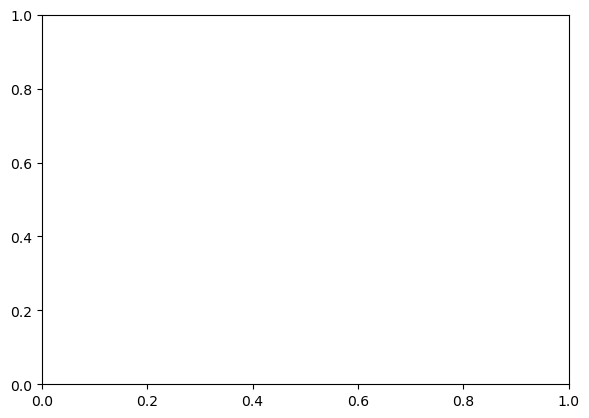

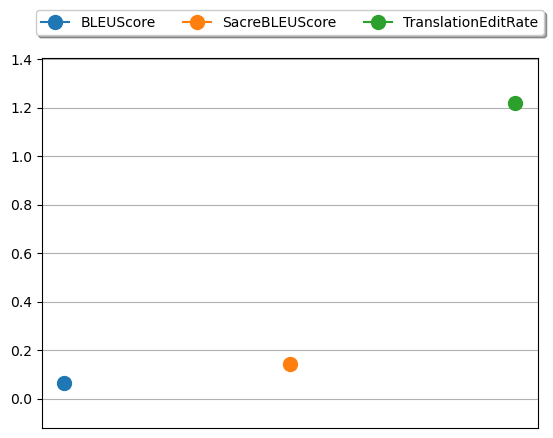

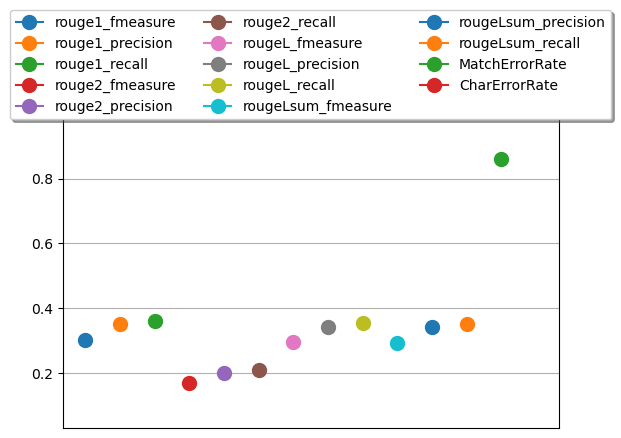

In [43]:
t_m_a, t_m_b = compute_metrics(train_preds)

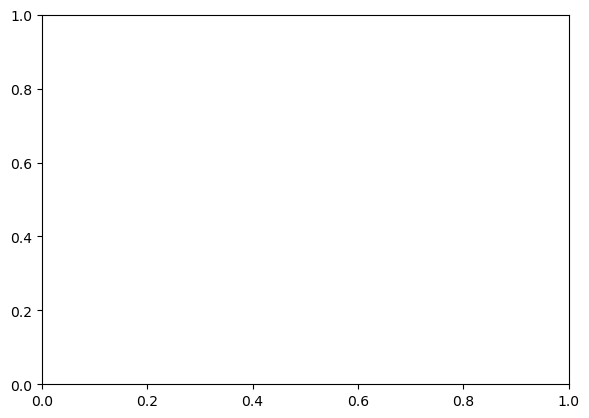

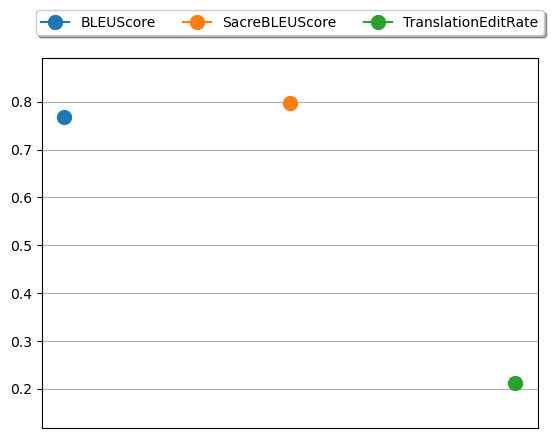

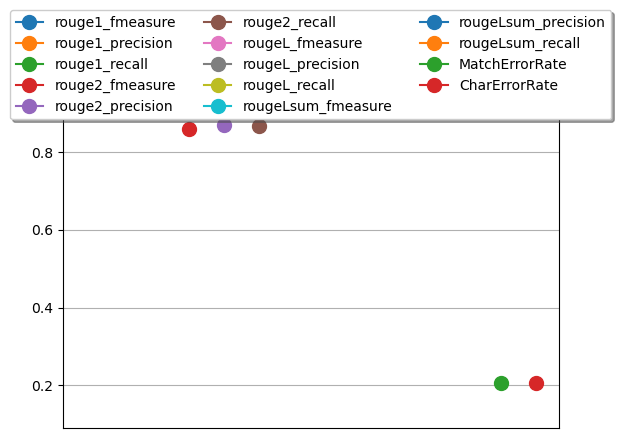

In [44]:
v_m_a, v_m_b = compute_metrics(eval_preds)

In [45]:
print(v_m_a)
print(v_m_b)

{'BLEUScore': tensor(0.7691), 'SacreBLEUScore': tensor(0.7969), 'TranslationEditRate': tensor(0.2117)}
{'rouge1_fmeasure': tensor(0.9146), 'rouge1_precision': tensor(0.9227), 'rouge1_recall': tensor(0.9253), 'rouge2_fmeasure': tensor(0.8585), 'rouge2_precision': tensor(0.8684), 'rouge2_recall': tensor(0.8665), 'rougeL_fmeasure': tensor(0.9104), 'rougeL_precision': tensor(0.9186), 'rougeL_recall': tensor(0.9207), 'rougeLsum_fmeasure': tensor(0.9104), 'rougeLsum_precision': tensor(0.9186), 'rougeLsum_recall': tensor(0.9206), 'MatchErrorRate': tensor(0.2054), 'CharErrorRate': tensor(0.2054)}
